In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
#get dummies
data_for_Operation=pd.get_dummies(data=data, columns=['Gender'])

In [6]:
data_for_Operation.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [7]:
X = data_for_Operation.drop(['Purchased','User ID'],axis=1)
y = data_for_Operation['Purchased'] # 0 or 1

In [8]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [9]:
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
X_train.head(10)

,Age,EstimatedSalary,Gender_Female,Gender_Male
250,44,39000,1,0
63,32,120000,0,1
312,38,50000,1,0
159,32,135000,1,0
283,52,21000,1,0
340,53,104000,1,0
81,39,42000,0,1
349,38,61000,0,1
153,36,50000,1,0
295,36,63000,1,0


In [12]:
# Feature Scaling
'''The idea behind StandardScaler is that it will transform your data 
such that its distribution will have a mean value 0 and standard deviation of 1.'''
'''StandardScaler performs the task of Standardization. Usually a dataset 
contains variables that are different in scale.For e.g. an Employee dataset will 
contain AGE column with values on scale 20-70 and SALARY column with values 
on scale 10000-80000.As these two columns are different in scale, they are 
Standardized to have common scale while building machine learning model.'''
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

'StandardScaler performs the task of Standardization. Usually a dataset \ncontains variables that are different in scale.For e.g. an Employee dataset will \ncontain AGE column with values on scale 20-70 and SALARY column with values \non scale 10000-80000.As these two columns are different in scale, they are \nStandardized to have common scale while building machine learning model.'

In [13]:
#X_train

In [14]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\premp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[68,  0],
       [32,  0]], dtype=int64)

The result is telling us that we have 65+24=89 correct predictions and 3+8=11 incorrect predictions.

In [18]:
#caculate the accuracy score
# Accuracy = number of times you're right / number of predictions
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))

0.63

In [20]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
x_actual=data['Age'].values

In [22]:
y_actual=data['Purchased'].values

In [23]:
mean_x=np.mean(x_actual)
mean_y=np.mean(y_actual)
numerator=0
dinom=0
n=len(y_actual)
for i in range(n):
    numerator += (x_actual[i]-mean_x)*(y_actual[i]-mean_y)
    dinom +=(x_actual[i]-mean_x)**2
slope=numerator/dinom #m
coff=mean_y-(slope* mean_x) #c
print('m->',slope)
print('c->',coff)

m-> 0.028493451798426266
c-> -0.7154209274697412


In [24]:
from matplotlib import pyplot as plt

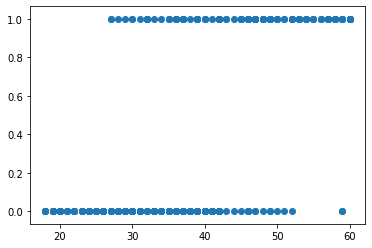

In [25]:
plt.scatter(x_actual,y_actual)

In [26]:
y=slope*x_actual+coff

In [27]:
l=[]
for i in range(n):
    value=1/(1+np.exp(-y[i]))
    l.append(value)

In [28]:
odds=np.array(l)

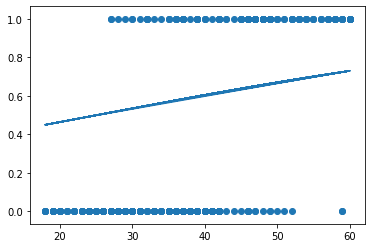

In [29]:
plt.scatter(x_actual,y_actual)
plt.plot(x_actual,odds)